In [56]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("/content/IBNSINA.csv",parse_dates=['DATE'])
df.head()

,#,DATE,TRADING CODE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,YCP,TRADE,VALUE (mn),VOLUME
0,439,2018-05-08,IBNSINA,306.0,319.5,305.0,311.0,306.1,306.3,1217.0,64.278,206556.0
1,438,2018-06-08,IBNSINA,301.8,307.4,298.3,305.5,300.3,306.1,744.0,32.516,107437.0
2,437,2018-07-08,IBNSINA,296.6,304.0,293.9,304.0,295.1,300.3,817.0,37.425,125501.0
3,436,2018-08-08,IBNSINA,298.8,306.1,294.5,296.0,296.3,295.1,708.0,39.266,131382.0
4,435,2018-09-08,IBNSINA,300.0,304.9,291.3,296.3,298.0,296.3,628.0,24.447,82592.0


In [57]:
# Sort DataFrame by date
df = df.sort_values('DATE')

# Double check the result
df.head()

,#,DATE,TRADING CODE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,YCP,TRADE,VALUE (mn),VOLUME
36,403,2018-01-10,IBNSINA,280.1,285.0,279.7,280.3,280.3,279.7,698.0,31.318,110873.0
59,380,2018-01-11,IBNSINA,238.3,241.4,237.0,240.5,239.4,240.4,296.0,6.548,27435.0
37,402,2018-02-10,IBNSINA,277.5,282.8,274.2,281.2,276.3,280.3,827.0,33.399,120034.0
79,360,2018-02-12,IBNSINA,240.0,241.8,238.0,240.0,238.9,242.0,477.0,10.392,43333.0
16,423,2018-03-09,IBNSINA,290.2,295.3,290.2,292.7,290.5,292.6,391.0,20.225,69398.0


In [58]:
df = df.set_index('DATE')
df.head(3)

,#,TRADING CODE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,YCP,TRADE,VALUE (mn),VOLUME
DATE,,,,,,,,,,,
2018-01-10,403,IBNSINA,280.1,285.0,279.7,280.3,280.3,279.7,698.0,31.318,110873.0
2018-01-11,380,IBNSINA,238.3,241.4,237.0,240.5,239.4,240.4,296.0,6.548,27435.0
2018-02-10,402,IBNSINA,277.5,282.8,274.2,281.2,276.3,280.3,827.0,33.399,120034.0


In [59]:
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [60]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [61]:
df['volatility'] = df['volatility']*100

In [62]:
import matplotlib.pyplot as plt 

In [63]:
df=df.reset_index()['volatility']

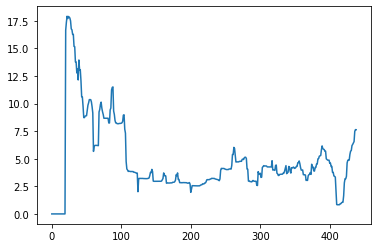

In [64]:
plt.plot(df)

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [66]:
df.shape

(439, 1)

In [67]:
##splitting dataset into train and test split where train=70 percent and test=30 percent
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]




In [68]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [69]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [70]:

print(X_train.shape), print(y_train.shape)

(206, 100)
(206,)


(None, None)

In [71]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)



In [72]:
from google.colab import drive

In [18]:
drive.mount('/content/drive')


Mounted at /content/drive


In [73]:
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
 

In [20]:

model=Sequential()
model.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(100,1))))
model.add(Bidirectional(LSTM(50,return_sequences=True)))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 14s 543ms/step - loss: 0.0562 - val_loss: 0.0264
Epoch 2/100
7/7 [==============================] - 2s 220ms/step - loss: 0.0082 - val_loss: 0.0399
Epoch 3/100
7/7 [==============================] - 2s 217ms/step - loss: 0.0059 - val_loss: 0.0143
Epoch 4/100
7/7 [==============================] - 2s 218ms/step - loss: 0.0061 - val_loss: 0.0271
Epoch 5/100
7/7 [==============================] - 2s 218ms/step - loss: 0.0055 - val_loss: 0.0195
Epoch 6/100
7/7 [==============================] - 2s 217ms/step - loss: 0.0045 - val_loss: 0.0148
Epoch 7/100
7/7 [==============================] - 2s 218ms/step - loss: 0.0042 - val_loss: 0.0181
Epoch 8/100
7/7 [==============================] - 2s 219ms/step - loss: 0.0041 - val_loss: 0.0124
Epoch 9/100
7/7 [==============================] - 2s 222ms/step - loss: 0.0037 - val_loss: 0.0131
Epoch 10/100
7/7 [==============================] - 2s 217ms/step - loss: 0.0031 - val_loss: 0.0123
Epoch 11

In [74]:
filepath1 = "/content/drive/MyDrive/stock_price_BILSTM/modelsIBNSINA/model.h5"



In [75]:
filepath2 = "/content/drive/MyDrive/stock price CNN/modelsIBNSINA/model1.h5"

In [76]:
filepath3 = "/content/drive/MyDrive/stock_price_BILSTM/modelsIBNSINA/model.h5"



In [77]:
X = np.reshape(ytest,(1, ytest.size))
Y_test =scaler.inverse_transform(X)

In [78]:
from keras.models import load_model



In [79]:
model1 = load_model(filepath1)

In [80]:
model2 = load_model(filepath2)

In [81]:
model3 = load_model(filepath3)

In [82]:
predicted1 = model1.predict(X_test)

In [83]:
predicted2 = model2.predict(X_test)

In [84]:
predicted3 = model3.predict(X_test)

In [85]:
predicted1 = scaler.inverse_transform(predicted1)
predicted2 = scaler.inverse_transform(predicted2)
predicted3 = scaler.inverse_transform(predicted3)

In [86]:
import tensorflow as tf
from sklearn.metrics import r2_score

In [87]:
Y_test = Y_test.transpose()

In [88]:
Y_test

array([[3.40031531],
       [3.33576764],
       [2.16976503],
       [0.84743907],
       [0.83024663],
       [0.83047049],
       [0.83251486],
       [0.83251486],
       [0.92133951],
       [0.92475339],
       [1.01814602],
       [1.0480618 ],
       [1.05894413],
       [1.64421273],
       [2.81218613],
       [3.18640458],
       [3.18495377],
       [3.40556798],
       [4.62212599],
       [4.8637966 ],
       [4.87696143],
       [4.87595992],
       [5.39006825],
       [5.68439031],
       [5.74525138],
       [6.19616053],
       [6.29838604],
       [6.42966536],
       [6.55622475],
       [7.47836252],
       [7.63840352]])

In [89]:
predicted1

array([[3.5546155 ],
       [3.4196045 ],
       [3.3132632 ],
       [2.9618974 ],
       [2.3654923 ],
       [1.8871678 ],
       [1.5237648 ],
       [1.2592221 ],
       [1.0741293 ],
       [0.9723731 ],
       [0.9143751 ],
       [0.910627  ],
       [0.9268    ],
       [0.95377153],
       [1.1312149 ],
       [1.5870643 ],
       [2.0764046 ],
       [2.47754   ],
       [2.8442924 ],
       [3.4369364 ],
       [3.9643683 ],
       [4.3620963 ],
       [4.6391273 ],
       [4.945202  ],
       [5.2219586 ],
       [5.414735  ],
       [5.635089  ],
       [5.7941394 ],
       [5.909909  ],
       [5.9925113 ],
       [6.243567  ]], dtype=float32)

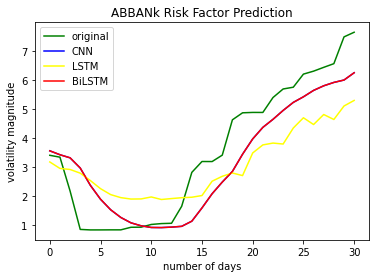

In [93]:

### Plotting 

plt.plot(Y_test,color ='green', label ='original')
plt.plot(predicted1,color ='blue', label ='CNN')
plt.plot(predicted2,color ='yellow', label ='LSTM')
plt.plot(predicted3,color ='red', label ='BiLSTM')


plt.xlabel('number of days')
plt.ylabel('volatility magnitude')
plt.title('ABBANk Risk Factor Prediction')
plt.legend(loc='best')
plt.show(block=False)


In [32]:

##Transformback to original form
train_predict = np.reshape(train_predict,(1, train_predict.size))
train_predict=scaler.inverse_transform(train_predict)
test_predict = np.reshape(test_predict,(1, test_predict.size))
test_predict=scaler.inverse_transform(test_predict)
X = np.reshape(ytest,(1, ytest.size))
Y_test =scaler.inverse_transform(X)

NameError: ignored

In [ ]:
Y_test

array([[3.40031531, 3.33576764, 2.16976503, 0.84743907, 0.83024663,
        0.83047049, 0.83251486, 0.83251486, 0.92133951, 0.92475339,
        1.01814602, 1.0480618 , 1.05894413, 1.64421273, 2.81218613,
        3.18640458, 3.18495377, 3.40556798, 4.62212599, 4.8637966 ,
        4.87696143, 4.87595992, 5.39006825, 5.68439031, 5.74525138,
        6.19616053, 6.29838604, 6.42966536, 6.55622475, 7.47836252,
        7.63840352]])

In [ ]:
test_predict

array([[ 0.07329169,  0.07044969,  0.06745621,  0.064027  ,  0.05891807,
         0.05218294,  0.0443318 ,  0.03581287,  0.02712983,  0.01854996,
         0.01029374,  0.00579858, -0.00136188, -0.00749922, -0.01274384,
        -0.01651296, -0.0160889 , -0.01306935, -0.01159565, -0.00849156,
        -0.00436385,  0.00089073,  0.00714683,  0.01388077,  0.02096713,
         0.02813568,  0.03524068,  0.04259209,  0.04944445,  0.05646357,
         0.06437383]], dtype=float32)

In [ ]:
test_predict.shape

(1, 31)

In [ ]:
#Y_test = Y_test.transpose()
RMSE = math.sqrt(mean_squared_error(Y_test,test_predict))
RMSE

4.160205144977553

In [ ]:

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test,test_predict)
print('MAE: %f' % mae)


MAE: 0.585392


In [ ]:
train_predict.shape

(1, 206)

In [ ]:
test_predict.shape

(1, 31)

In [ ]:
test_predict = test_predict.transpose()

In [ ]:
train_predict = train_predict.transpose()

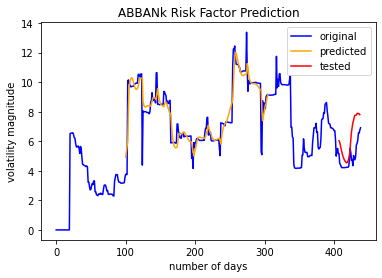

In [ ]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df),color ='blue', label ='original')
plt.plot(trainPredictPlot, color ='orange', label ='predicted')
plt.plot(testPredictPlot , color ='red', label ='tested')
#plt.show()
plt.xlabel('number of days')
plt.ylabel('volatility magnitude')
plt.title('ABBANk Risk Factor Prediction')
plt.legend(loc='best')
plt.show(block=False)


In [ ]:

x_input=test_data[32:].reshape(1,-1)
x_input.shape


(1, 100)

In [ ]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)


[0.5823239]
101
1 day input [0.46939476 0.46508239 0.33064757 0.31554556 0.31142385 0.31143423
 0.31143423 0.31272627 0.31236791 0.31274351 0.31244482 0.31275278
 0.31520767 0.314971   0.37868554 0.37870705 0.46062637 0.41516084
 0.39319655 0.39156389 0.39182234 0.39223981 0.37026831 0.37065393
 0.37035112 0.37450905 0.37683625 0.37710066 0.37629008 0.44014014
 0.47956168 0.51625221 0.51703151 0.51669583 0.53956476 0.49445231
 0.4958781  0.41719452 0.40917669 0.41538423 0.4168736  0.46112966
 0.55572431 0.56214907 0.56230355 0.59237323 0.59078332 0.63592415
 0.64031881 0.64471553 0.6044776  0.57544794 0.54010989 0.53696481
 0.5351887  0.5168587  0.51666936 0.51436681 0.51332907 0.50908814
 0.50235861 0.50158278 0.45756382 0.37334524 0.39898636 0.4123765
 0.3864597  0.3864597  0.33799657 0.33068152 0.32166857 0.31502429
 0.31501535 0.31496654 0.31487897 0.31532685 0.31532685 0.31619613
 0.31704009 0.31691474 0.31691474 0.32145788 0.35203741 0.41169048
 0.39144382 0.35172436 0.3559866  0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

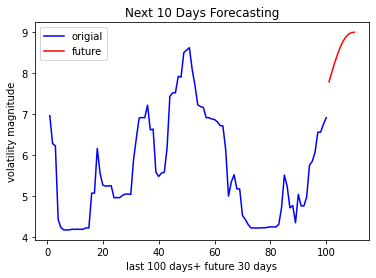

In [ ]:

plt.plot(day_new,scaler.inverse_transform(df[339:]),color ='blue', label ='origial')
plt.plot(day_pred,scaler.inverse_transform(lst_output),color='red', label='future')
plt.xlabel('last 100 days+ future 30 days')
plt.ylabel('volatility magnitude')
plt.title('Next 10 Days Forecasting')
plt.legend(loc='best')
plt.show(block=False)

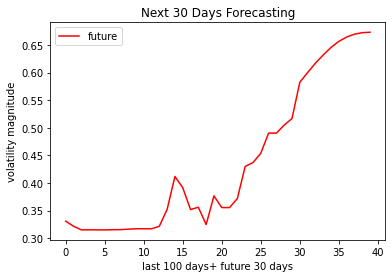

In [ ]:
df3=df.tolist()
df3.extend(lst_output)
plt.xlabel('last 100 days+ future 30 days')
plt.ylabel('volatility magnitude')
plt.title('Next 30 Days Forecasting')
plt.plot(df3[409:],color='red', label='future')
plt.legend(loc='best')
plt.show(block=False)

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

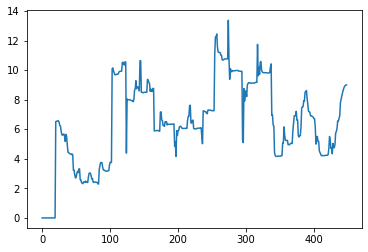

In [ ]:
plt.plot(df3)